### Modeller
Baselines vi skal have med:
- Random choose candidates from df
- Mergesort choose candidates from df
- Mergesort hardcoded to account for gender
- Plain RankNet

Fair model:
- RankNet account for diversity 

In [31]:
#Load packages
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import random

In [120]:
#plots setup
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

### DF

In [142]:
#Start here and load the dataframe
df = pd.read_csv("df_sum_score.csv")
df = df[df.STRATUM != "0"] #0 corresponds to nan, i.e. removing nans
df["strat_new"] = df.STRATUM.apply(lambda x: x.replace(" ", "_"))

#### Average score generation

In [143]:
df["HI_GRADE_AVG"] = df[["CR_S11", "CC_S11", "ENG_S11"]].mean(axis=1)
df["COL_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Mergesort

In [144]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [145]:
#Top 100
df_sort[:100]

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,6145,M,Stratum 4,71,91,95,100,100,99,99.666667,85.666667,0,Stratum_4
6269,6269,M,Stratum 1,100,67,90,100,96,99,98.333333,85.666667,0,Stratum_1
8041,8041,M,Stratum 3,82,90,85,100,99,96,98.333333,85.666667,0,Stratum_3
8352,8352,M,Stratum 6,75,82,100,42,2,94,46.000000,85.666667,0,Stratum_6


#### Random Sort

In [146]:
df_random = df.sample(n = 100, random_state=2)

In [147]:
df_random

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
10027,10027,M,Stratum 4,55,60,50,47,37,17,33.666667,55.000000,0,Stratum_4
11999,11999,M,Stratum 5,63,62,75,72,53,91,72.000000,66.666667,0,Stratum_5
3874,3874,M,Stratum 2,49,62,48,27,44,43,38.000000,53.000000,0,Stratum_2
3456,3456,M,Stratum 2,53,64,50,53,58,27,46.000000,55.666667,0,Stratum_2
10147,10147,M,Stratum 4,74,77,90,84,76,96,85.333333,80.333333,0,Stratum_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1558,F,Stratum 2,55,51,38,23,57,66,48.666667,48.000000,1,Stratum_2
1554,1554,M,Stratum 2,44,45,57,61,41,63,55.000000,48.666667,0,Stratum_2
2773,2773,F,Stratum 4,64,69,55,98,92,89,93.000000,62.666667,1,Stratum_4
6341,6341,M,Stratum 2,43,49,46,27,29,50,35.333333,46.000000,0,Stratum_2


#### Merge sort for Female df and Male df and append and sort

In [148]:
def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_mergesort(df)




,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
2,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
3,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1,Stratum_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,5198,5198,F,Stratum 2,87,73,90,96,84,92,90.666667,83.333333,1,Stratum_2
96,48,12204,12204,M,Stratum 5,84,77,100,100,98,92,96.666667,87.000000,0,Stratum_5
97,48,5877,5877,F,Stratum 2,74,91,85,98,93,3,64.666667,83.333333,1,Stratum_2
98,49,8104,8104,F,Stratum 2,86,82,82,87,96,93,92.000000,83.333333,1,Stratum_2


### Apply comments from meeting with Laura:
- Undersøg quality measures for ranking i bias bibel/søgning på nettet.
    - fx. mean average precision
    
    
- Lav to plots for at måle signifikans af de to andre baselines ift random.:
    1. plot top n grades as function of n for random baseline med error bars i form af std. og average + average af mergesort og diversity
    2. lav plot 1 af entropy som funktion af n.
    
    
- Lav random baseline med time bounded seed og kør +2000 runder. 

#### Quality measures

**Quality measure 1: mean average precision** https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2

#### Creating random baseline and plot as function of n together with the mergesort

In [149]:
# The mergesort as function of n
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#check the sorted grades 
df_avg.HI_GRADE_AVG

5129     100.000000
11864     97.666667
4874      96.666667
7340      96.666667
1089      95.000000
            ...    
3588      33.666667
3741      32.333333
1157      32.000000
3015      30.333333
2012      26.000000
Name: HI_GRADE_AVG, Length: 12397, dtype: float64

In [150]:
#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()

#check the incremented average grades
df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

5129     100.000000
11864     98.833333
4874      98.111111
7340      97.750000
1089      97.200000
            ...    
3588      61.114312
3741      61.111990
1157      61.109641
3015      61.107158
2012      61.104326
Name: incr_hi_mean, Length: 12397, dtype: float64

In [151]:
#cumsum of index to use for plot
df_avg["n_students"] = range(len(df))

In [152]:
#our new df
df_avg.head(5)

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,incr_col_mean,n_students
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,100.000000,98.666667,0
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,98.833333,98.666667,1
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,98.111111,98.222222,2
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,97.750000,97.750000,3
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,97.200000,97.600000,4


Text(0, 0.5, 'incremented average')

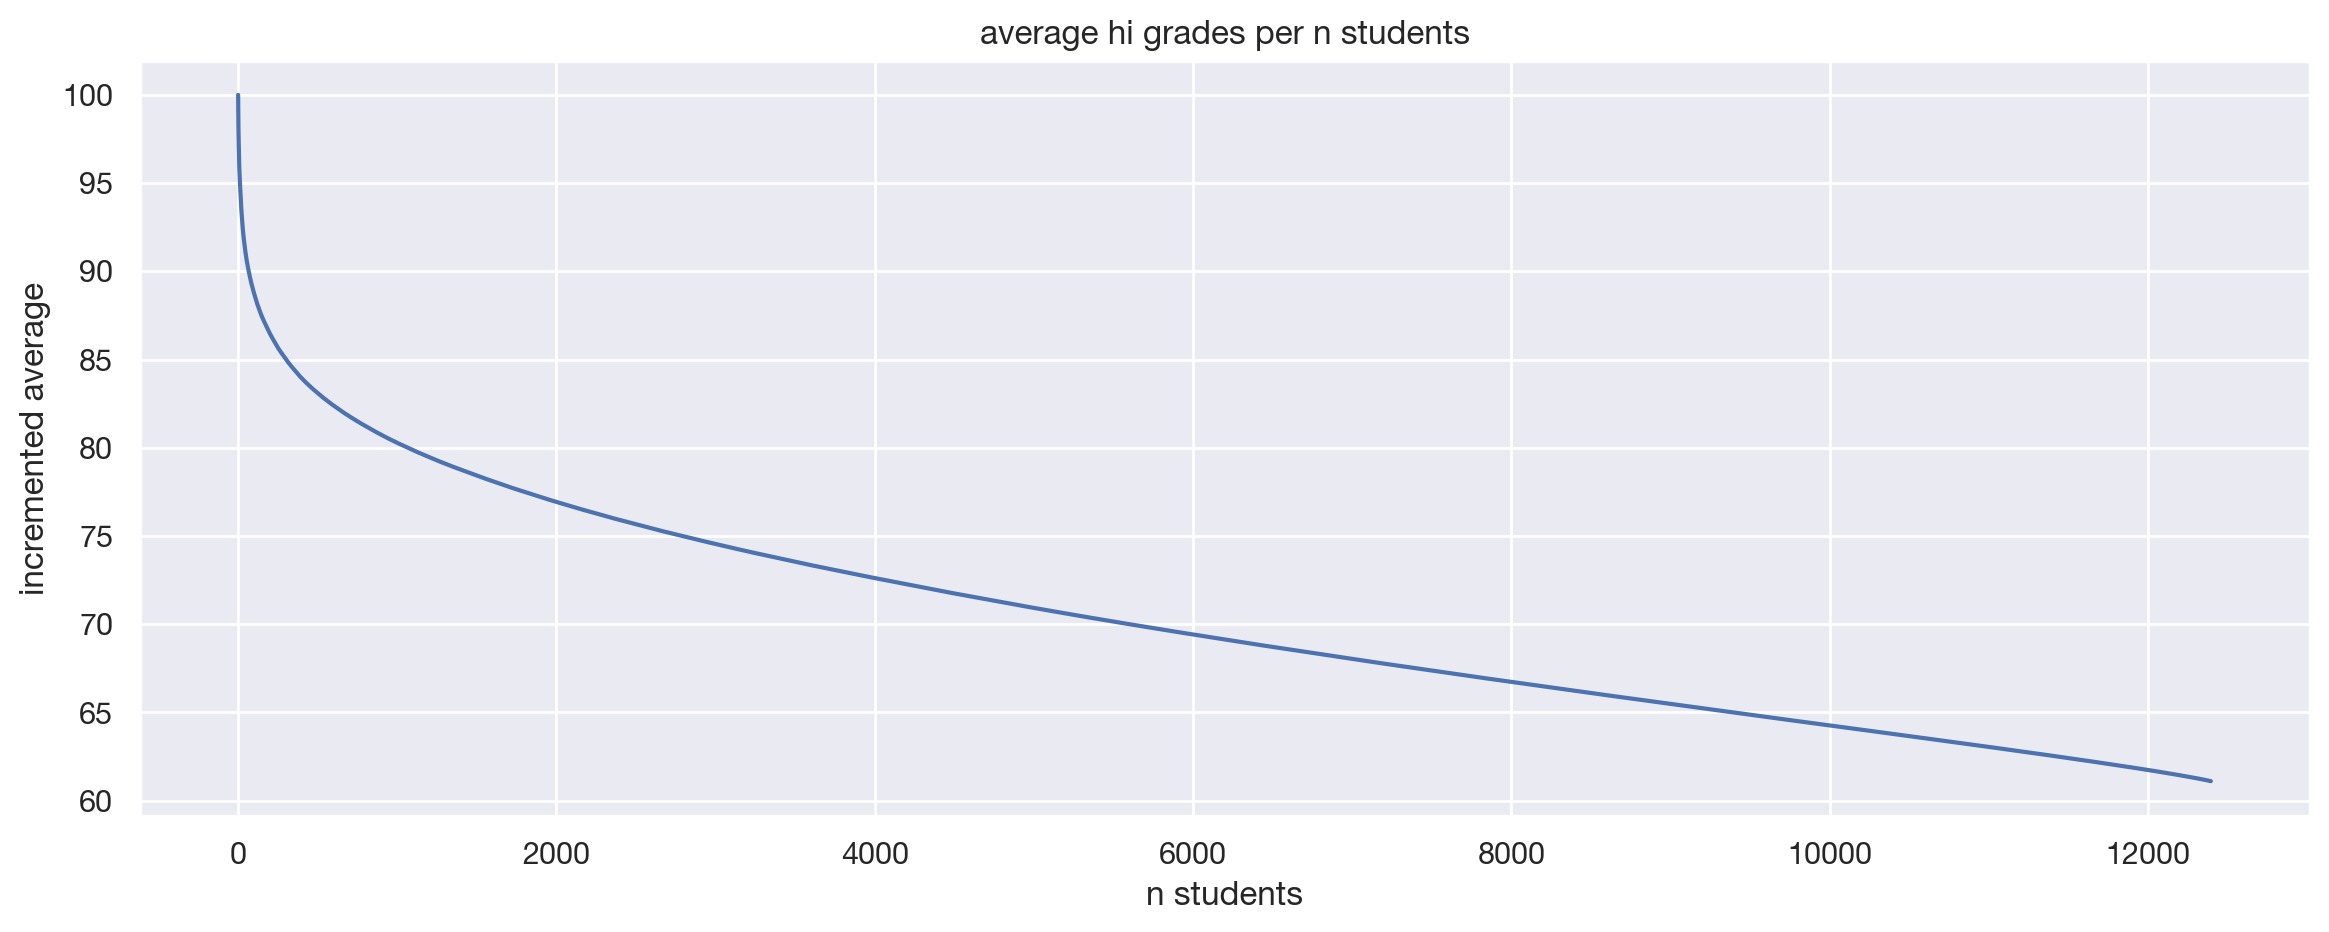

In [153]:
# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg).set_title("average hi grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented average')


*Generating the random dataframes and apply same method as above*

In [ ]:
# First we check the grade distribution, to predict what we can expect
import numpy as np
sns.distplot(np.round(df_use.HI_GRADE_AVG))

In [154]:
#Random generated dfs

df_use = df[["Unnamed: 0","HI_GRADE_AVG", "GENDER_bin", "strat_new"]]

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(len(df_random1))
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_hi_mean"] = df_random2.HI_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(len(df_random2))
        df_random1 = df_random1.append(df_random2)

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["n_students"] = range(len(df_random1))
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:13: SettingWithCopyWarning: 
A value is trying to be set o

In [155]:
#check the result of all the appended dfs:
df_random1

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,n_students
559,559,66.666667,0,Stratum_3,66.666667,0
1675,1675,61.000000,0,Stratum_2,63.833333,1
5694,5694,57.666667,1,Stratum_1,61.777778,2
8116,8116,44.000000,1,Stratum_1,57.333333,3
1837,1837,63.666667,0,Stratum_2,58.600000,4
...,...,...,...,...,...,...
2102,2102,56.333333,0,Stratum_2,61.104279,12392
6054,6054,47.000000,0,Stratum_2,61.103141,12393
4761,4761,68.000000,1,Stratum_3,61.103698,12394
81,81,63.000000,0,Stratum_4,61.103851,12395


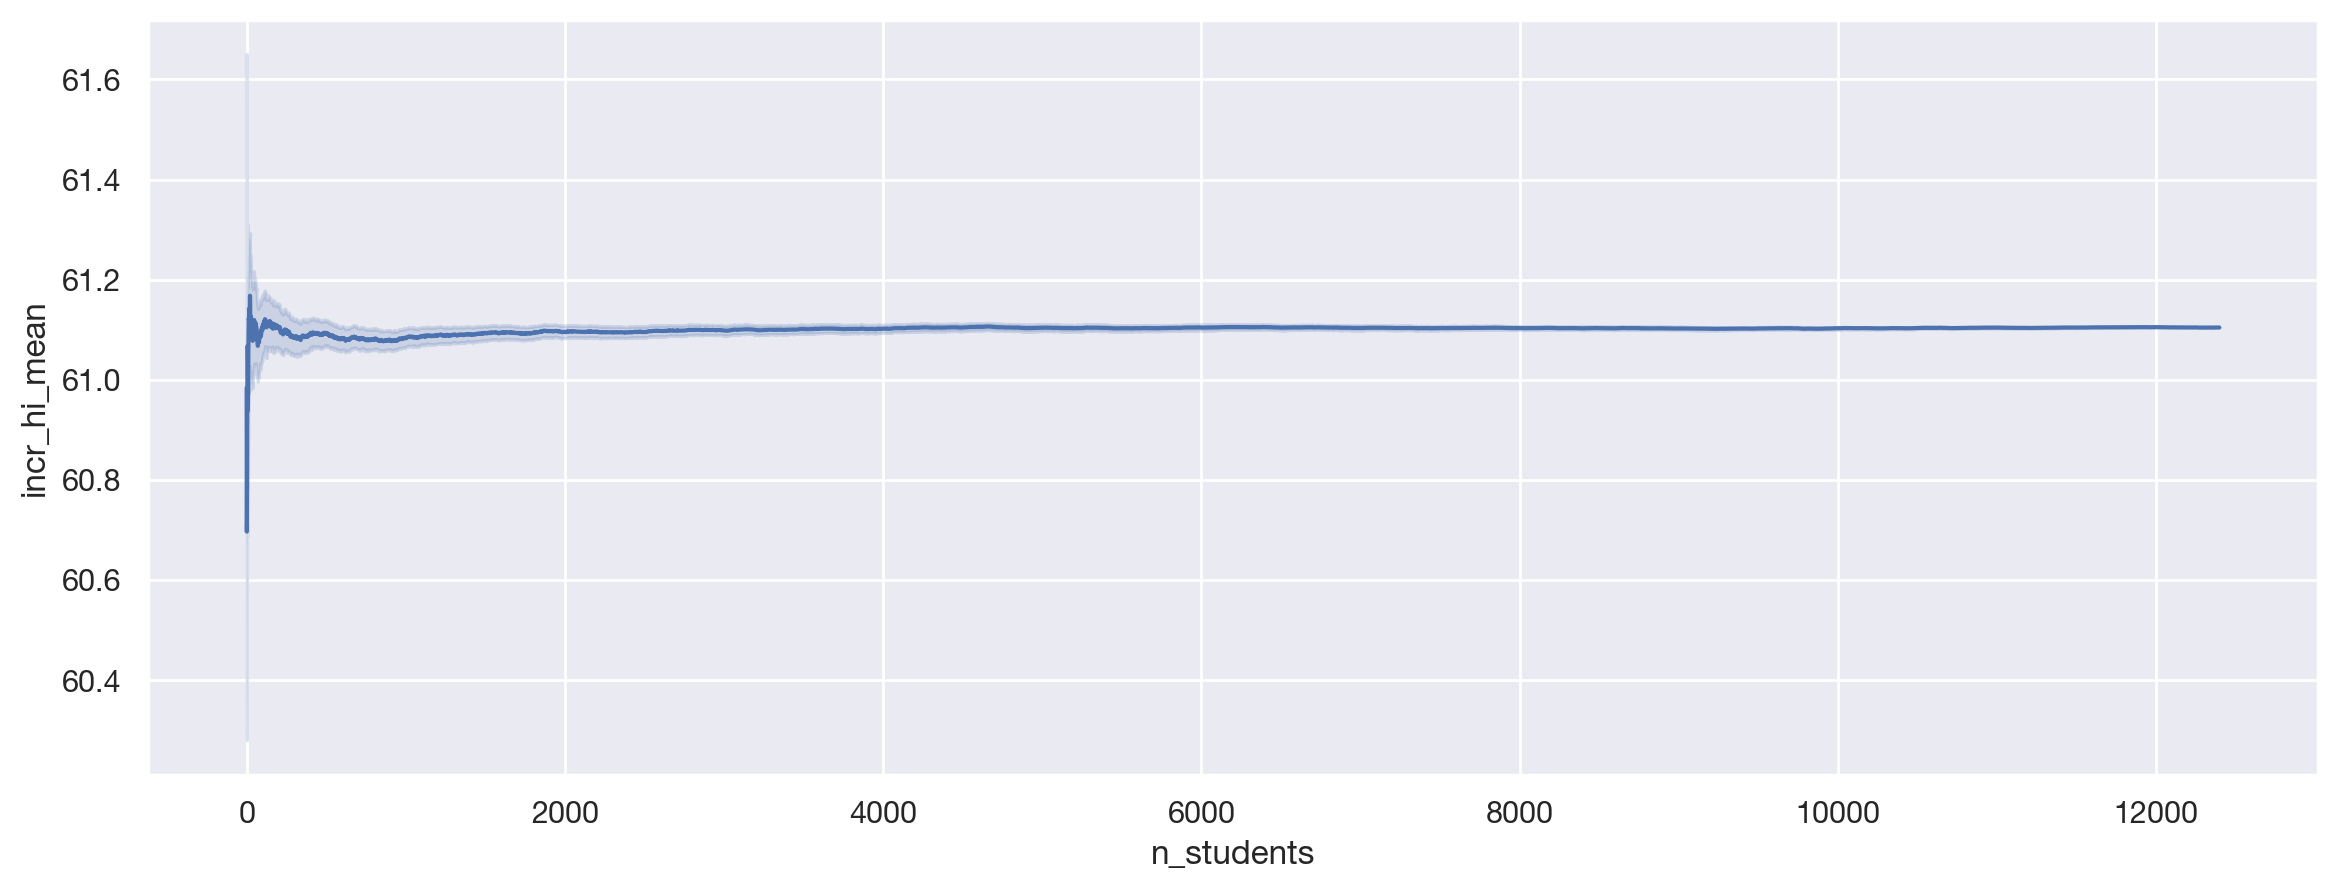

In [121]:
#First we plot the random grades per n students
# w 2000 samples

sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean")
plt.show()

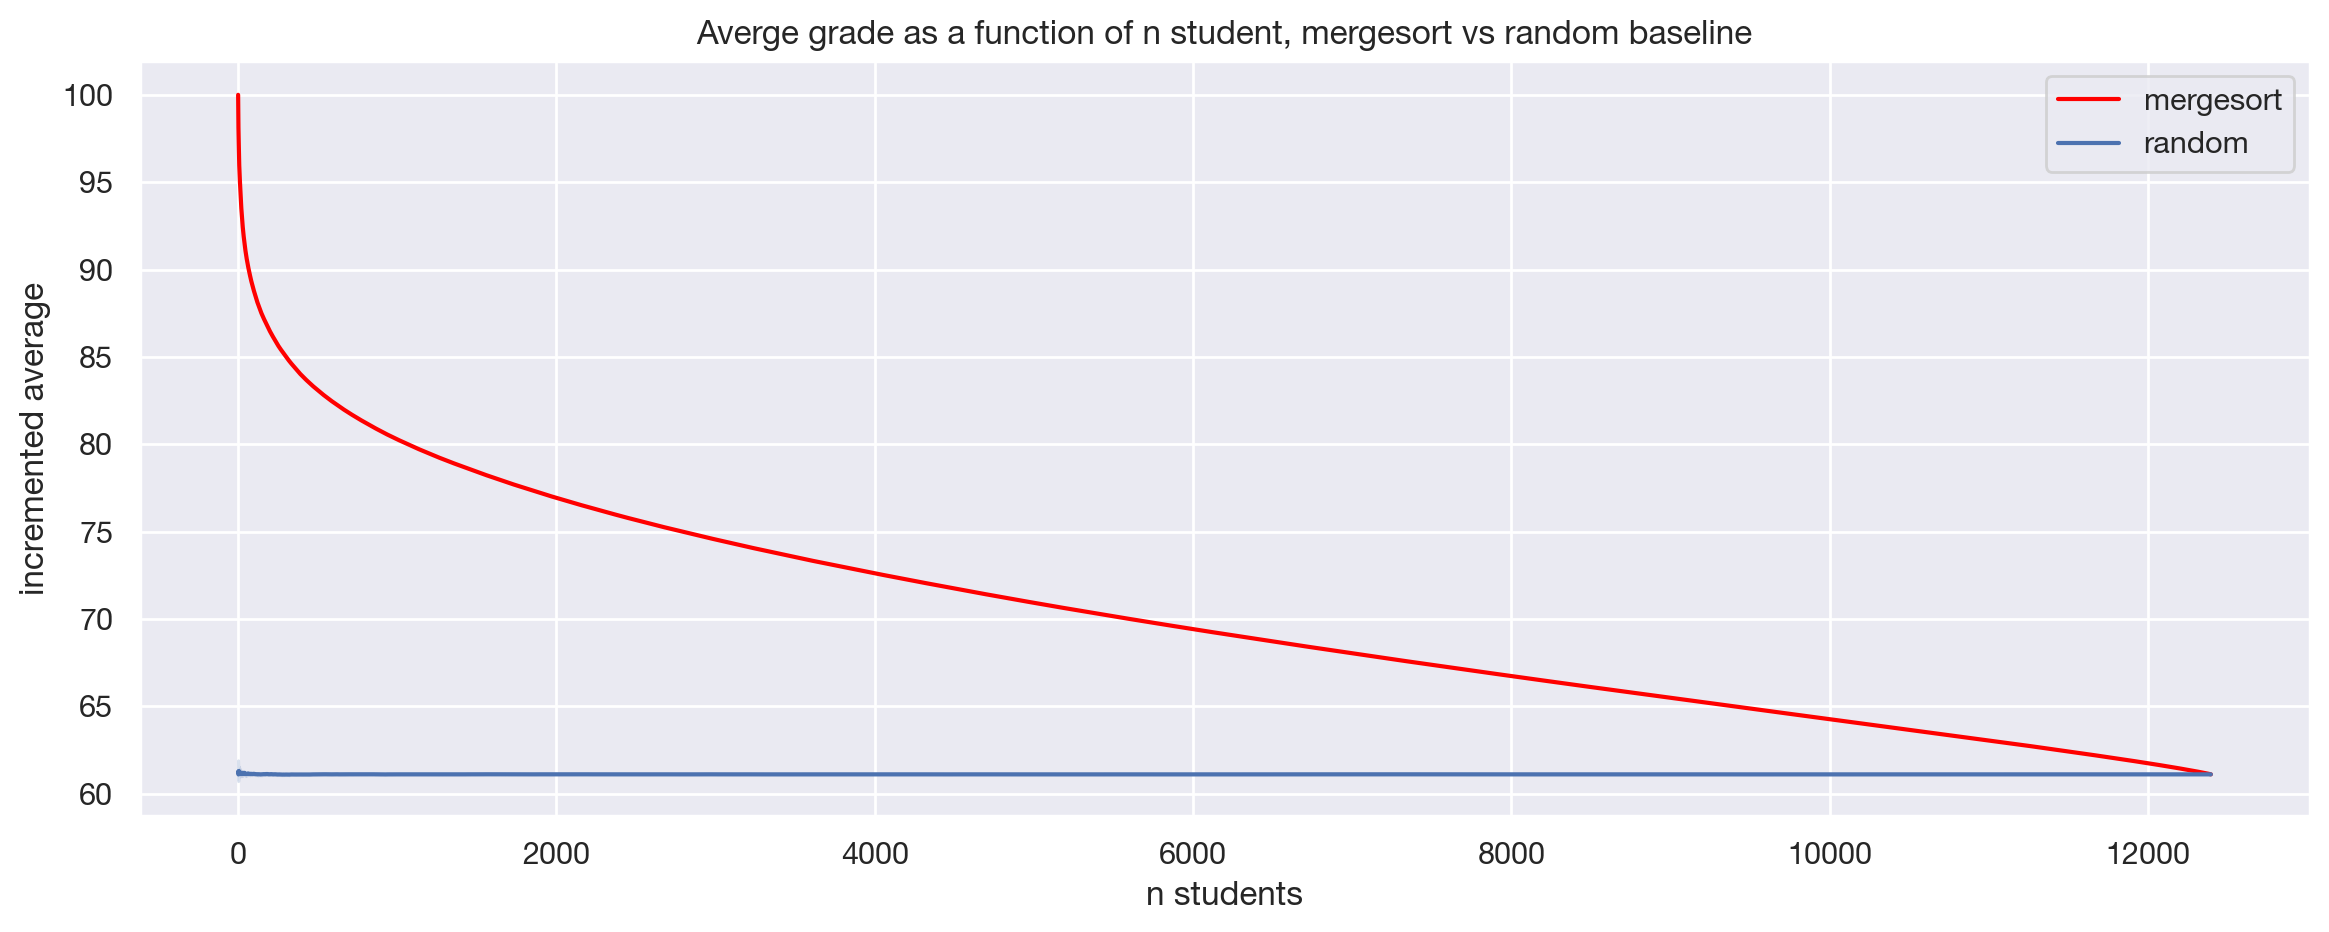

In [156]:
# Finally we plot the random grades per n students together with the mergesort grades per n students

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color='red')
sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean")
plt.xlabel('n students')
plt.ylabel('incremented average')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "random"], loc ="upper right")
plt.show()

### Plot 1 as entropy of n, used to measure *diversity*. https://en.wikipedia.org/wiki/Diversity_index, https://arxiv.org/ftp/arxiv/papers/0810/0810.3525.pdf

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
gdf = df_use.groupby(["GENDER_bin", "strat_new"]).mean() #example to get a view of the groupby
gdf

Unnamed: 0   HI_GRADE_AVG
GENDER_bin strat_new                           
0          Stratum_1     5907748   56086.666667
           Stratum_2    14194704  139351.333333
           Stratum_3    14244905  146527.000000
           Stratum_4     5975127   62091.000000
           Stratum_5     2725222   27684.333333
           Stratum_6     1969876   19644.000000
1          Stratum_1     4607743   39491.000000
           Stratum_2    10234696   96408.333333
           Stratum_3    10399500  103129.666667
           Stratum_4     4119153   41774.000000
           Stratum_5     1588236   16077.000000
           Stratum_6     1009644    9246.000000

$p_{i}$ is the avg_hi_grade for the candidate divided by the total avg_hi_grade for all of the candidates in the same gender-stratum group as the $i^{th}$ candidate

In [161]:
d_sum = df_use.groupby(["GENDER_bin", "strat_new"])['HI_GRADE_AVG'].transform('sum')
values = df_use['HI_GRADE_AVG']/d_sum
df_use['Entropy'] = -(values*np.log(values))


df_ent = df_use.groupby(["GENDER_bin", "strat_new"],as_index=False,sort=False)['Entropy'].sum()


/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/4010912047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Entropy'] = -(values*np.log(values))


In [166]:
df_ent #.groupby(["GENDER_bin", "strat_new"]) #.sum()

,GENDER_bin,strat_new,Entropy
0,1,Stratum_4,6.451416
1,1,Stratum_5,5.449947
2,0,Stratum_2,7.765133
3,1,Stratum_2,7.393995
4,0,Stratum_4,6.833054
5,1,Stratum_6,4.868942
6,0,Stratum_5,5.978010
7,1,Stratum_3,7.417007
8,0,Stratum_6,5.598795
9,1,Stratum_1,6.547231


In [171]:
df_ent.Entropy.sum()

78.95915313900323

In [167]:
#Create new column in dataframe with entropy 

df_entropy = df_use.copy()

In [ ]:
df_entropy["Entropy"] = df_entropy

In [170]:
df_entropy.groupby(["GENDER_bin", "strat_new"])["Entropy"].sum()

GENDER_bin  strat_new
0           Stratum_1    6.899707
            Stratum_2    7.765133
            Stratum_3    7.755916
            Stratum_4    6.833054
            Stratum_5    5.978010
            Stratum_6    5.598795
1           Stratum_1    6.547231
            Stratum_2    7.393995
            Stratum_3    7.417007
            Stratum_4    6.451416
            Stratum_5    5.449947
            Stratum_6    4.868942
Name: Entropy, dtype: float64

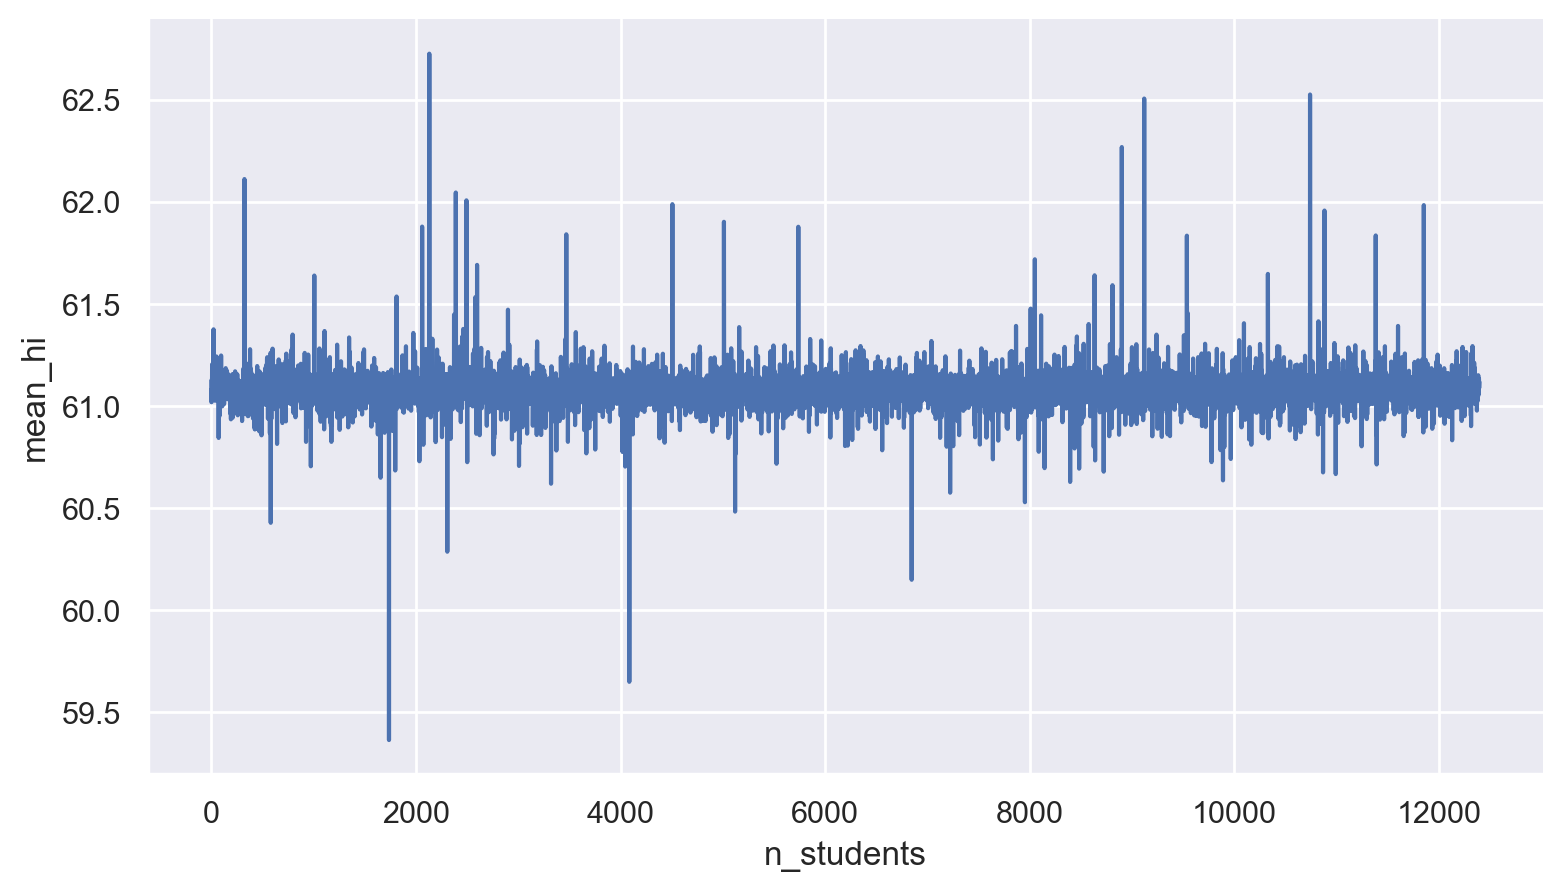

In [100]:
# prøv først at plot ét line plot: average grade som funktion af n
# Draw seaborn lineplot with error band based on the standard deviation
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=df_use_new, x="n_students", y="mean_hi")
sns.despine()
plt.show()